# Face Detection with MTCNN, from Video

## Tenserflow Logging Disabling

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

## Libraries Import

In [2]:
import time

import cv2
import matplotlib.pyplot as pyplot
import numpy as np
from IPython.display import clear_output
from mtcnn import MTCNN

## Configuration

In [3]:
HIGHLIGHT_COLOR = (255, 0, 0)
SECONDS_TO_RUN = 5

## Informations about the Video Stream

In [4]:
cap = cv2.VideoCapture(0)
fps = cap.get(cv2.CAP_PROP_FPS)

print("The width of the frames is {}.".format(cv2.CAP_PROP_FRAME_WIDTH))
print("The height of the frame is {}.".format(cv2.CAP_PROP_FRAME_HEIGHT))
print("The number of frames per seconds is {}.".format(fps))

The width of the frames is 3.
The height of the frame is 4.
The number of frames per seconds is 30.0.


## Face Recognition with MTCNN

In [5]:
def plot_image(image: np.array, title: str = None, cmap: str = None) -> None:
    pyplot.imshow(image, cmap=cmap)
    if title:
        pyplot.title(title)
    pyplot.axis("off")
    pyplot.show(cmap)

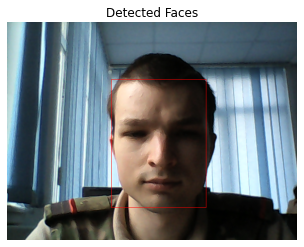

In [6]:
detector = MTCNN()

start_time =  time.time()
while (True):
    _, frame = cap.read()
    image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    faces = detector.detect_faces(image)
    for face in faces:
        x, y, width, height = face["box"]
        cv2.rectangle(image, (x, y), (x + width, y + height), HIGHLIGHT_COLOR)

    clear_output(wait=True)
    plot_image(image, "Detected Faces")

    if (time.time() - start_time > SECONDS_TO_RUN):
        break